In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

from torch.utils.data import Subset
from vqvaes.trainer import VQVAETrainer
from vqvaes.models import build_vqvae
from data.nouns import make_datasets, create_dataloader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from vqvaes.evals import evaluate_vqvae_recon, evaluate_vqvae

/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_set, test_set = make_datasets()
# make subset of trainset
train_set = Subset(train_set, range(10))
train_loader = create_dataloader(train_set, batch_size=32)
test_loader = create_dataloader(test_set, batch_size=32)

In [4]:
train_set[0]["image"]

Image([[[0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706],
        [0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706],
        [0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706],
        ...,
        [0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706],
        [0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706],
        [0.6706, 0.6706, 0.6706,  ..., 0.6706, 0.6706, 0.6706]],

       [[0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941],
        [0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941],
        [0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941],
        ...,
        [0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941],
        [0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941],
        [0.6941, 0.6941, 0.6941,  ..., 0.6941, 0.6941, 0.6941]],

       [[0.7647, 0.7647, 0.7647,  ..., 0.7647, 0.7647, 0.7647],
        [0.7647, 0.7647, 0.7647,  ..., 0.7647, 0.7647, 0.7647],
        [0.7647, 0.7647, 0.7647,  ..., 0.7647, 0.7647, 0.7647],
        ..

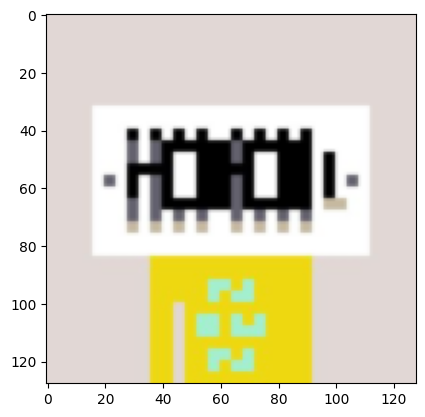

In [5]:
image = train_set[8]["image"]
plt.imshow(image.permute(1, 2, 0) * 0.5 + 0.5)

In [8]:
vqvae = build_vqvae(
    in_channels=3,
    num_channels=128,
    num_residual_blocks=2,
    num_residual_channels=32,
    codebook_size=512,
    codebook_dim=64,
)

trainer = VQVAETrainer(vqvae, train_loader, test_loader, lr=3e-4, iterations=1000, device="cuda")

In [9]:
trainer.train()

[INFO] Training...
[INFO] Number of parameters: 517603


  0%|          | 5/1000 [00:00<00:24, 39.89it/s, loss=0.488, perplexity=1.59, recon_loss=0.465, vq_loss=0.0226]

100%|██████████| 1000/1000 [00:28<00:00, 34.69it/s, loss=0.259, perplexity=7.27, recon_loss=0.0205, vq_loss=0.238]


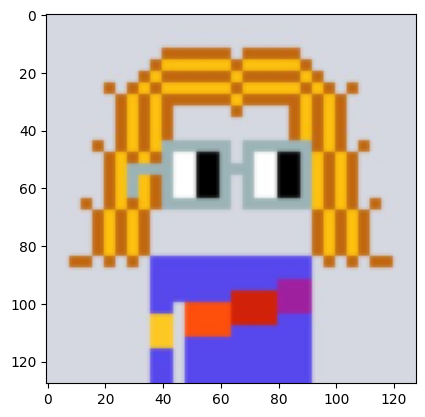

In [10]:
image = train_set[0]["image"]
plt.imshow(image.permute(1, 2, 0) * 0.5 + 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2377078..1.1130514].


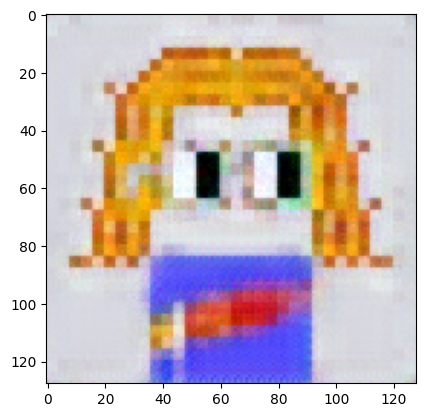

In [11]:
recon = vqvae(image.unsqueeze(0).cuda())[0].squeeze(0).detach().cpu()
plt.imshow(recon.permute(1, 2, 0) * 0.5 + 0.5)

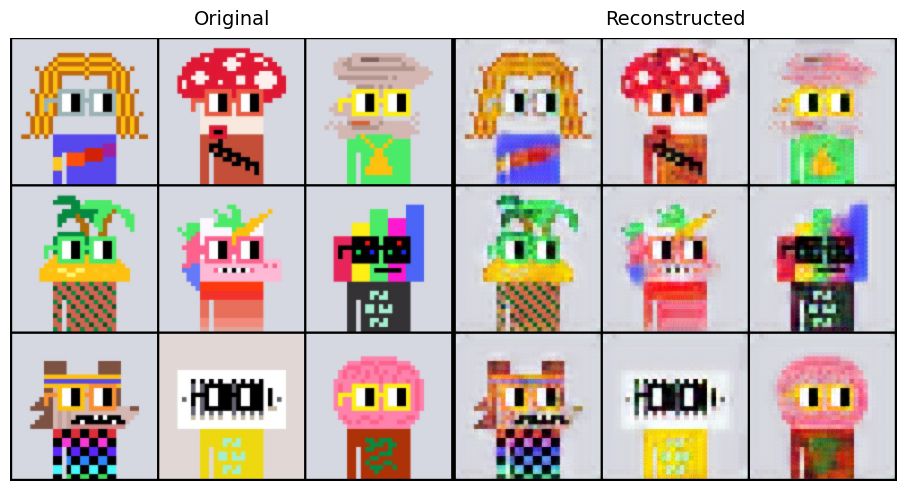

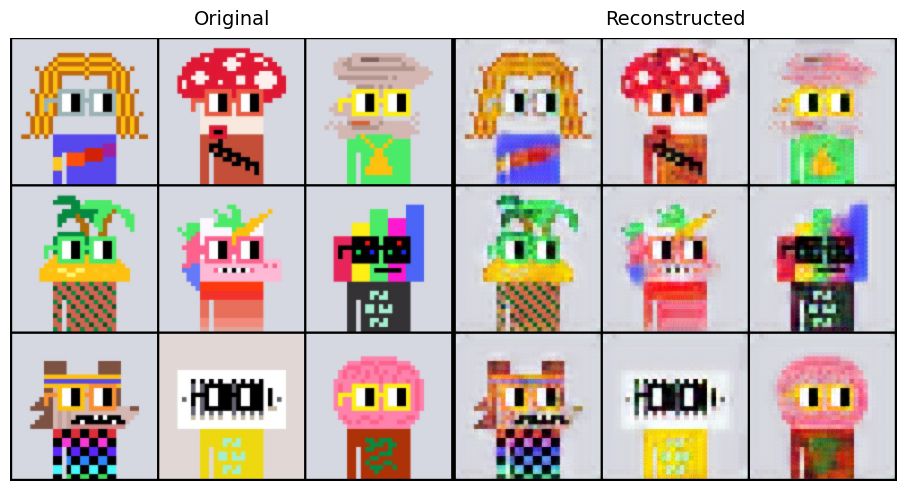

In [12]:
evaluate_vqvae_recon(
    train_set,
    indices=[0, 1, 2, 3, 4, 5, 6, 8, 9],
    model=vqvae,
)

In [13]:
evaluate_vqvae(train_loader, vqvae)

Evaluating VQVAE: 100%|██████████| 1/1 [00:00<00:00, 42.96it/s]


{'loss': 0.25786468386650085,
 'recon_loss': 0.020539335906505585,
 'perplexity': 7.272773742675781}